# Linear Regression

Implement linear regression without sklearn.linearregression. The goal of this practice is to help me better understand how linear regression works.

In [1]:
# import library and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# load dataset

boston = load_boston()

df = pd.DataFrame(boston['data'], columns = boston['feature_names'])

price = pd.DataFrame(boston['target'], columns = ['Price'])


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
price.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
# build X and y

X = df.as_matrix(columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'])

# feature normalization

scaler = StandardScaler()

X = scaler.fit_transform(X)

y = price.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


## Gradient Descent

In [7]:
# Define cost function and gradient descent

def cost_function (X, y, theta):
    
    size = len(X)
    
    m = np.ones((size,1))
    
    new_X = np.hstack((m,X))
    
    hx = np.matmul(new_X, theta)
    
    cost =  np.sum((hx - y)**2)/(2*size)
    
    return cost

def gradient_desc(X, y, learning_rate, n_iter):
    
    size = len(X)
    
    cost = np.ones((n_iter,1))
    
    m = np.ones((size,1))
    
    new_X = np.hstack((m,X))
    
    theta = np.zeros((np.size(new_X,1),1))
        
    for i in range(0, n_iter):
        
        hx = np.matmul(new_X, theta)
    
        gradient = np.matmul(np.transpose(new_X),(hx - y))
        
        theta = theta - gradient * learning_rate
        
        cost[i] = cost_function(X,y,theta)
    
    return theta, cost
    

In [8]:
# prepare to plot cost

# I tried different learning rates to get this result - 0.0001

n_iter = 1500

x_axis = np.arange(1, n_iter + 1)

y_axis = np.array(gradient_desc(X,y,0.0001,n_iter)[1])

Text(0,0.5,'Cost')

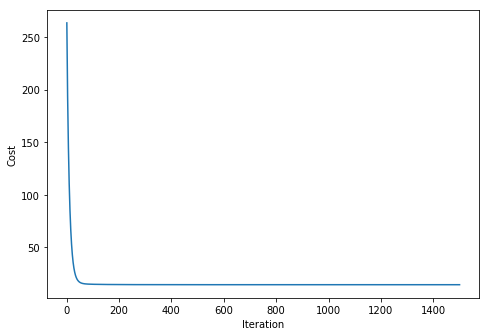

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x_axis, y_axis)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')

In [10]:
# print parameters

gradient_desc(X,y,0.0001,n_iter)[0]


array([[22.53280632],
       [-1.62503272],
       [ 0.92049833],
       [-0.12850794],
       [-2.53046469],
       [ 4.33940918],
       [-1.22569683],
       [-3.36411955],
       [ 2.41490996],
       [-2.35304762],
       [-2.26597893]])

## Normal Equation

In [11]:
def normal_equation(X, y):
    
    size = len(X)

    m = np.ones((size,1))
    
    new_X = np.hstack((m,X))
    
    x_trans = np.transpose(new_X)
    
    x_trans_x = np.matmul(x_trans,new_X)
    
    inv_trans_x = np.linalg.inv(x_trans_x)
    
    theta = np.matmul(np.matmul(inv_trans_x,x_trans),y)
    
    return theta

In [12]:
normal_equation(X,y)

array([[22.53280632],
       [-1.62617439],
       [ 0.92242929],
       [-0.12260686],
       [-2.53167055],
       [ 4.33848709],
       [-1.22504629],
       [-3.36372064],
       [ 2.43008459],
       [-2.37032452],
       [-2.26645351]])

We can see that gradient descent and normal equation generate very similar parameters, which is expected. Next, I will us sklearn to train a linear regression model on the same dataset and evalute the model.

# Sklearn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
size = len(X)

m = np.ones((size,1))
    
sk_X = np.hstack((m,X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# print parameters

print(lm.intercept_)

[22.27286502]


In [17]:
coef_df = pd.DataFrame(lm.coef_)

coef_df

,0,1,2,3,4,5,6,7,8,9
0,-1.532651,0.913969,-0.161474,-2.436479,4.224481,-0.92542,-3.061411,2.06939,-2.044032,-2.422181


In [18]:
# predictions

predictions = lm.predict(X_test)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

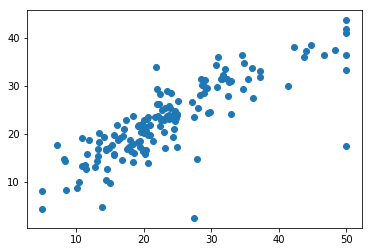

In [20]:
plt.scatter(y_test, predictions)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


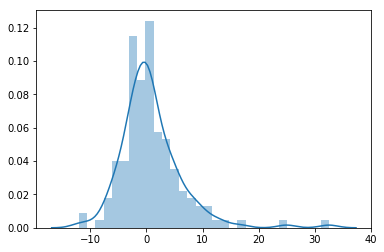

In [21]:
sns.distplot((y_test-predictions), bins = 30)

In [ ]:
# looks like we have some outliers in our data. The next step is to check our dataset to determine how to handle outliers.